<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/dev_backend/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['max_iter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


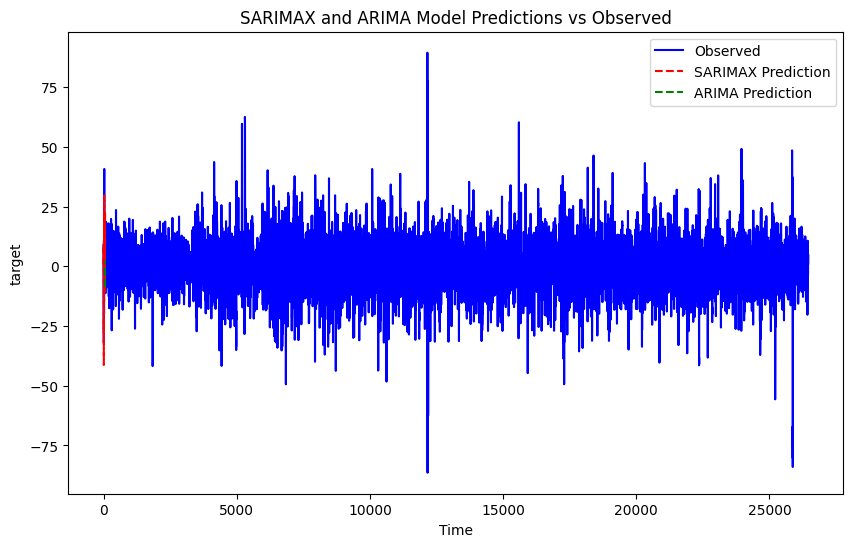

In [14]:
# Assuming you're using statsmodels for time series analysis
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Filter rows where 'stock_id' is 22
train_dataset_row_22 = df[df['stock_id'] == 22]

# Drop unnecessary columns
train_22 = train_dataset_row_22.drop(axis='columns', columns=['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'row_id'])

# Set 'time_id' as the index
train_22 = train_22.set_index('time_id')

# SARIMAX model
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 7  # Example values, please replace with appropriate orders and seasonal periodicity
column_name = 'target'  # Corrected column name
model_sarimax = SARIMAX(train_22[column_name], order=(p, d, q), seasonal_order=(P, D, Q, s), max_iter=1000)
result_sarimax = model_sarimax.fit()

# ARIMA model
day = 1
start = (day - 1) * 55
end = day * 55

arma_diff1 = ARIMA(train_22[start:end-4].diff(), order=(1, 0, 3)).fit()
forecast_arma = arma_diff1.predict(end-4, end-1, dynamic=True)
test = train_22[end-4:end]
mse_arma = ((forecast_arma - test[column_name]) ** 2).mean()
baseline_mae_arma = (forecast_arma - test[column_name]).abs().mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
train_22[column_name].plot(ax=ax, label='Observed', color='blue')
result_sarimax.predict(start=start, end=end-1).plot(ax=ax, label='SARIMAX Prediction', color='red', linestyle='dashed')
forecast_arma.plot(ax=ax, label='ARIMA Prediction', color='green', linestyle='dashed')

ax.set_xlabel('Time')
ax.set_ylabel(column_name)
plt.title('SARIMAX and ARIMA Model Predictions vs Observed')
plt.legend()
plt.show()
